https://colab.research.google.com/drive/1OZzSii4ffSzVu5WngxZkSZysjKZTtfTv?usp=sharing

In [2]:
!pip install wfdb

     |████████████████████████████████| 122kB 2.7MB/s 
     |████████████████████████████████| 6.8MB 8.6MB/s 
     |████████████████████████████████| 163kB 42.6MB/s 
  Created wheel for wfdb: filename=wfdb-3.1.1-cp36-none-any.whl size=117828 sha256=84008ff349f01c0aece8bbc9ee887e22011ffd65b84d346c46d262db6e8744b1
  Stored in directory: /root/.cache/pip/wheels/bc/d0/c1/90538d266ccba2d1076fbc9970192c7ea1a09c99df3e65c69b
Successfully built wfdb


## Download data

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget -r -N -c -np https://physionet.org/files/ptbdb/1.0.0/ /content/gdrive/

In [3]:
!ls

sample_data


In [ ]:
%cd gdrive/

/content/gdrive


In [ ]:
!ls

'My Drive'  'Shared drives'


In [6]:
!ls /content/gdrive/My\ Drive/physionet.org


files  robots.txt


In [7]:
import os

In [8]:
data_path='/content/gdrive/My Drive/physionet.org/files/ptbdb/1.0.0'

In [8]:
path_names=os.listdir(data_path)
# for patient_path in path_names:
#   if not os.path.isdir(patient_path):
#       path_names.remove(patient_path)

In [9]:
len(path_names)

290

In [10]:
print(path_names)

['patient001', 'patient002', 'patient003', 'patient004', 'patient005', 'patient006', 'patient007', 'patient008', 'patient009', 'patient010', 'patient011', 'patient012', 'patient013', 'patient014', 'patient015', 'patient016', 'patient017', 'patient018', 'patient019', 'patient020', 'patient021', 'patient022', 'patient023', 'patient024', 'patient025', 'patient026', 'patient027', 'patient028', 'patient029', 'patient030', 'patient031', 'patient032', 'patient033', 'patient034', 'patient035', 'patient036', 'patient037', 'patient038', 'patient039', 'patient040', 'patient041', 'patient042', 'patient043', 'patient044', 'patient045', 'patient046', 'patient047', 'patient048', 'patient049', 'patient050', 'patient051', 'patient052', 'patient053', 'patient054', 'patient055', 'patient056', 'patient057', 'patient058', 'patient059', 'patient060', 'patient061', 'patient062', 'patient063', 'patient064', 'patient065', 'patient066', 'patient067', 'patient068', 'patient069', 'patient070', 'patient071', 'pati

In [ ]:
####################opening the head file######################
# HEADERFILE=''
# f=open(data_path+HEADERFILE,"r")
# z=f.readline().split()
# num_of_sig,s_freq=int(z[1]),int(z[2])     #% number of signals，sample rate of data

# dformat,gain,bitres,zerovalue,firstvalue=[],[],[],[],[]

# for i in range(num_of_sig):
#     z=f.readline().split()
#     dformat.append(int(z[1]))     #format
#     gain.append(int(z[2]))     #number of integers per mV
#     bitres.append(int(z[3]))     #bitresolution
#     zerovalue.append(int(z[4]))     #integer value of ECG zero point
#     firstvalue.append(int(z[5]))     #first integer value of signal (to test for errors)
# f.close()

In [ ]:
# num_of_sig,s_freq,bitres

(15, 1000, [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])

In [ ]:
# dformat,gain,bitres,zerovalue,firstvalue

([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000],
 [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-148,
  -73,
  75,
  110,
  -112,
  1,
  -189,
  -540,
  -380,
  -574,
  -638,
  -322,
  142,
  576,
  310])

In [ ]:
# dformat,gain,bitres,zerovalue,firstvalue

([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000],
 [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-148,
  -73,
  75,
  110,
  -112,
  1,
  -189,
  -540,
  -380,
  -574,
  -638,
  -322,
  142,
  576,
  310])

In [11]:
import numpy as np

In [ ]:
# ####################read .dat file######################
# f=open(data_path+'/patient001/s0014lre.dat',"rb")     #
# b=f.read()   
# f.close()

# A_init=np.frombuffer(b,dtype=np.uint8)      
# A_shape0=int(A_init.shape[0]/3)     
# A=A_init.reshape(A_shape0,3)[:]    
# A.shape

(921600, 3)

## discover the data

<class 'wfdb.io.record.Record'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adjust_datetime', '_arrange_fields', 'adc', 'adc_gain', 'adc_res', 'adc_zero', 'base_counter', 'base_date', 'base_time', 'baseline', 'block_size', 'byte_offset', 'calc_adc_params', 'calc_checksum', 'check_field', 'check_field_cohesion', 'check_read_inputs', 'check_sig_cohesion', 'checksum', 'comments', 'convert_dtype', 'counter_freq', 'd_signal', 'dac', 'e_d_signal', 'e_p_signal', 'file_name', 'fmt', 'fs', 'get_write_fields', 'get_write_subset', 'init_value', 'n_sig', 'p_signal', 'record_name', 'samps_per_frame', 'set_d_features', 'set_default', 'set_defaults', 'set_p_features', 'sig_len', 'sig_name', 'skew', 'smo

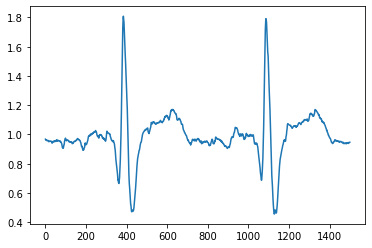

In [9]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
# plot ECG
def draw_ecg(x):
    plt.plot(x)
    plt.show()

#  read_ecg_data
def read_ecg_data(file_path,channel_names,sampfrom=0,smpto=1500):
    '''
    to read the ECG data
    sampfrom: start point，default sampfrom=0
    sampto：end poit，default to the end of data
    channel_names： chanel names which is a list，eg. channel_names=['vx']
    channels：a list with numbers，eg. channels=[0, 3]
    :return: record of ECG
    '''      
    record = wfdb.rdrecord(file_path, sampfrom=0, sampto = 1500 ,channel_names=['vz'])
    print(type(record))

    print(dir(record))

    print(record.p_signal)
    print(np.shape(record.p_signal))
    print(record.sig_len)
  
    print(record.record_name)
   
    print(record.n_sig)
   
    print(record.sig_name)
   
    print(record.fs)


    print("***************")
      

    
    print(wfdb.show_ann_labels())

    draw_ecg(record.p_signal)
    return record


#test function
test_file=data_path+'/patient001/s0014lre'
read_ecg_data(test_file,'vx')

In [ ]:
# # test how many .dat files
# for patient_path in path_names:
#   PATH=os.path.join(data_path,patient_path)   #path
#   if not os.path.isfile(PATH):
#     FILES=os.listdir(PATH)
#     print(FILES)        
#     for file in FILES:
#       if '.dat' in file:
#         print(file)   

# read all data to pd dataframe

In [10]:
import os
import wfdb
data_path='/content/gdrive/My Drive/physionet.org/files/ptbdb/1.0.0'

def read_data_files(data_path):
  path_names=os.listdir(data_path)
  # for name in path_names:
    # if not os.path.isdir(name):
    #     path_names.remove(name) 
  
  records=[]      
             
  for patient_path in path_names:
      PATH=os.path.join(data_path,patient_path)   #path
      if not os.path.isfile(PATH):
         FILES=os.listdir(PATH)
         #print(FILES) 
        # data_files=[]             
         for file in FILES:
           if '.hea' in file:
              #print(file)
              # data_files.append(file)
              record_path=os.path.join(PATH,file.split('.')[0])
              record=wfdb.rdrecord(record_path)
              records.append(record)

  return records         

all_records=read_data_files(data_path)

In [11]:
len(all_records)

549

In [12]:
import pandas as pd

def make_dataset(records): 
  df = pd.DataFrame(columns = ['record_name','gender','age','label'])
  # array_0=records[0].p_signala
  # print(array_0)
  # plt.plot(array_0)
  record_names=[]
  genders=[]
  ages=[]
  labels=[]
  arrays_sigs=[]
  for record in records:
    #print(record.record_name)
    record_names.append(record.record_name) 
    genders.append(record.comments[1].split(':')[1]) 
    ages.append(record.comments[0].split(':')[1])  
    labels.append(record.comments[4].split(':')[1])
    arrays_sigs.append(record.p_signal.T)
  df.record_name=record_names
  df.gender=genders
  df.age=ages
  df.label=labels
  df['arrays_all']=arrays_sigs

  channel_names=records[0].sig_name
  for i in range(15):
    df[channel_names[i]]=df.arrays_all.apply(lambda x: x[i])
  
  df.drop(['arrays_all'],axis=1,inplace=True)
  return df

In [13]:
df=make_dataset(all_records)
df.shape

(549, 19)

In [14]:
df.head(5)

,record_name,gender,age,label,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz
0,s0010_re,female,81,Myocardial infarction,"[-0.2445, -0.2425, -0.2415, -0.241, -0.2315, -...","[-0.229, -0.2335, -0.2345, -0.229, -0.227, -0....","[0.0155, 0.009, 0.007, 0.012, 0.0045, -0.007, ...","[0.237, 0.238, 0.238, 0.235, 0.2295, 0.2295, 0...","[-0.13, -0.1255, -0.124, -0.126, -0.118, -0.10...","[-0.107, -0.1125, -0.114, -0.109, -0.1115, -0....","[-0.044, -0.042, -0.044, -0.045, -0.0455, -0.0...","[-0.1205, -0.1175, -0.118, -0.1175, -0.117, -0...","[-0.056, -0.051, -0.0535, -0.0515, -0.0495, -0...","[0.106, 0.1095, 0.1095, 0.1115, 0.1115, 0.1075...","[0.1965, 0.202, 0.2005, 0.201, 0.2, 0.196, 0.1...","[0.195, 0.198, 0.1965, 0.197, 0.1985, 0.194, 0...","[-0.0015, -0.0015, -0.0035, -0.002, 0.0005, 0....","[0.06, 0.061, 0.0555, 0.0535, 0.0545, 0.056, 0...","[-0.009, -0.01, -0.0085, -0.008, -0.0085, -0.0..."
1,s0014lre,female,81,Myocardial infarction,"[-0.474, -0.444, -0.4555, -0.462, -0.459, -0.4...","[-0.0595, -0.032, -0.0345, -0.031, -0.018, -0....","[0.415, 0.4125, 0.422, 0.432, 0.442, 0.448, 0....","[0.267, 0.238, 0.2455, 0.2465, 0.239, 0.2455, ...","[-0.445, -0.4285, -0.439, -0.4475, -0.451, -0....","[0.178, 0.191, 0.194, 0.2005, 0.212, 0.2135, 0...","[1.252, 1.2575, 1.256, 1.256, 1.2605, 1.2545, ...","[1.287, 1.2845, 1.282, 1.2775, 1.276, 1.2705, ...","[-0.9325, -0.929, -0.936, -0.942, -0.945, -0.9...","[-0.822, -0.8215, -0.824, -0.828, -0.827, -0.8...","[1.614, 1.6195, 1.6195, 1.6185, 1.621, 1.6205,...","[1.708, 1.712, 1.7125, 1.7125, 1.7165, 1.716, ...","[0.5365, 0.5335, 0.5305, 0.531, 0.5305, 0.53, ...","[-1.1385, -1.1385, -1.141, -1.133, -1.1265, -1...","[0.9675, 0.9645, 0.961, 0.963, 0.962, 0.9595, ..."
2,s0016lre,female,81,Myocardial infarction,"[0.254, 0.263, 0.2755, 0.28, 0.3035, 0.305, 0....","[0.7535, 0.7615, 0.786, 0.805, 0.8415, 0.8505,...","[0.499, 0.498, 0.51, 0.5245, 0.5375, 0.545, 0....","[-0.5035, -0.5115, -0.5305, -0.542, -0.572, -0...","[-0.1225, -0.1175, -0.117, -0.122, -0.117, -0....","[0.626, 0.6295, 0.648, 0.6645, 0.6895, 0.6975,...","[0.5815, 0.5955, 0.6015, 0.6015, 0.6105, 0.613...","[0.7875, 0.8015, 0.8075, 0.8115, 0.823, 0.821,...","[0.936, 0.9535, 0.957, 0.962, 0.975, 0.975, 0....","[0.984, 1.001, 1.0065, 1.0125, 1.0235, 1.024, ...","[0.818, 0.8335, 0.833, 0.8385, 0.861, 0.859, 0...","[0.5385, 0.551, 0.5515, 0.5605, 0.581, 0.5755,...","[0.385, 0.38, 0.382, 0.382, 0.384, 0.3825, 0.3...","[-0.131, -0.132, -0.118, -0.1075, -0.106, -0.1...","[0.029, 0.024, 0.0245, 0.0275, 0.028, 0.0205, ..."
3,s0015lre,female,58,Myocardial infarction,"[0.2735, 0.287, 0.2925, 0.312, 0.3275, 0.3305,...","[-0.035, -0.037, -0.0315, -0.0175, -0.018, -0....","[-0.308, -0.3235, -0.324, -0.329, -0.345, -0.3...","[-0.119, -0.125, -0.1305, -0.147, -0.1545, -0....","[0.291, 0.305, 0.3085, 0.3205, 0.336, 0.3415, ...","[-0.1715, -0.18, -0.178, -0.1735, -0.1815, -0....","[0.68, 0.669, 0.6645, 0.6525, 0.641, 0.63, 0.6...","[0.333, 0.3295, 0.33, 0.319, 0.3155, 0.3135, 0...","[0.391, 0.413, 0.4315, 0.4405, 0.45, 0.468, 0....","[0.0545, 0.0775, 0.097, 0.109, 0.121, 0.138, 0...","[-0.3835, -0.3605, -0.341, -0.33, -0.319, -0.3...","[-0.198, -0.18, -0.169, -0.1615, -0.1535, -0.1...","[-0.3205, -0.292, -0.286, -0.277, -0.2575, -0....","[-0.179, -0.1935, -0.197, -0.1975, -0.205, -0....","[-0.0045, -0.006, -0.016, -0.024, -0.02, -0.02..."
4,s0017lre,male,63,Myocardial infarction,"[-0.6195, -0.6225, -0.626, -0.6275, -0.626, -0...","[-0.9435, -0.9575, -0.969, -0.968, -0.964, -0....","[-0.3235, -0.3345, -0.3425, -0.34, -0.3375, -0...","[0.782, 0.7905, 0.7975, 0.798, 0.795, 0.7915, ...","[-0.1475, -0.1435, -0.141, -0.1435, -0.144, -0...","[-0.6335, -0.646, -0.656, -0.654, -0.6505, -0....","[-0.011, -0.0095, -0.0035, -0.0045, -0.001, -0...","[-0.187, -0.1855, -0.1785, -0.1785, -0.179, -0...","[-0.3385, -0.338, -0.3315, -0.3345, -0.334, -0...","[-0.2675, -0.267, -0.263, -0.265, -0.265, -0.2...","[-0.188, -0.187, -0.182, -0.1865, -0.1865, -0....","[-0.3335, -0.334

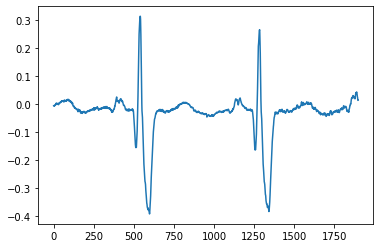

In [ ]:
plt.plot(df.vx[0][100:2000].flatten())

In [19]:
grouped = df.groupby(['label']).head(3)
grouped.shape

(34, 19)

In [18]:
grouped.head(10)

,record_name,gender,age,label,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz
0,s0010_re,female,81,Myocardial infarction,"[-0.2445, -0.2425, -0.2415, -0.241, -0.2315, -...","[-0.229, -0.2335, -0.2345, -0.229, -0.227, -0....","[0.0155, 0.009, 0.007, 0.012, 0.0045, -0.007, ...","[0.237, 0.238, 0.238, 0.235, 0.2295, 0.2295, 0...","[-0.13, -0.1255, -0.124, -0.126, -0.118, -0.10...","[-0.107, -0.1125, -0.114, -0.109, -0.1115, -0....","[-0.044, -0.042, -0.044, -0.045, -0.0455, -0.0...","[-0.1205, -0.1175, -0.118, -0.1175, -0.117, -0...","[-0.056, -0.051, -0.0535, -0.0515, -0.0495, -0...","[0.106, 0.1095, 0.1095, 0.1115, 0.1115, 0.1075...","[0.1965, 0.202, 0.2005, 0.201, 0.2, 0.196, 0.1...","[0.195, 0.198, 0.1965, 0.197, 0.1985, 0.194, 0...","[-0.0015, -0.0015, -0.0035, -0.002, 0.0005, 0....","[0.06, 0.061, 0.0555, 0.0535, 0.0545, 0.056, 0...","[-0.009, -0.01, -0.0085, -0.008, -0.0085, -0.0..."
1,s0014lre,female,81,Myocardial infarction,"[-0.474, -0.444, -0.4555, -0.462, -0.459, -0.4...","[-0.0595, -0.032, -0.0345, -0.031, -0.018, -0....","[0.415, 0.4125, 0.422, 0.432, 0.442, 0.448, 0....","[0.267, 0.238, 0.2455, 0.2465, 0.239, 0.2455, ...","[-0.445, -0.4285, -0.439, -0.4475, -0.451, -0....","[0.178, 0.191, 0.194, 0.2005, 0.212, 0.2135, 0...","[1.252, 1.2575, 1.256, 1.256, 1.2605, 1.2545, ...","[1.287, 1.2845, 1.282, 1.2775, 1.276, 1.2705, ...","[-0.9325, -0.929, -0.936, -0.942, -0.945, -0.9...","[-0.822, -0.8215, -0.824, -0.828, -0.827, -0.8...","[1.614, 1.6195, 1.6195, 1.6185, 1.621, 1.6205,...","[1.708, 1.712, 1.7125, 1.7125, 1.7165, 1.716, ...","[0.5365, 0.5335, 0.5305, 0.531, 0.5305, 0.53, ...","[-1.1385, -1.1385, -1.141, -1.133, -1.1265, -1...","[0.9675, 0.9645, 0.961, 0.963, 0.962, 0.9595, ..."
2,s0016lre,female,81,Myocardial infarction,"[0.254, 0.263, 0.2755, 0.28, 0.3035, 0.305, 0....","[0.7535, 0.7615, 0.786, 0.805, 0.8415, 0.8505,...","[0.499, 0.498, 0.51, 0.5245, 0.5375, 0.545, 0....","[-0.5035, -0.5115, -0.5305, -0.542, -0.572, -0...","[-0.1225, -0.1175, -0.117, -0.122, -0.117, -0....","[0.626, 0.6295, 0.648, 0.6645, 0.6895, 0.6975,...","[0.5815, 0.5955, 0.6015, 0.6015, 0.6105, 0.613...","[0.7875, 0.8015, 0.8075, 0.8115, 0.823, 0.821,...","[0.936, 0.9535, 0.957, 0.962, 0.975, 0.975, 0....","[0.984, 1.001, 1.0065, 1.0125, 1.0235, 1.024, ...","[0.818, 0.8335, 0.833, 0.8385, 0.861, 0.859, 0...","[0.5385, 0.551, 0.5515, 0.5605, 0.581, 0.5755,...","[0.385, 0.38, 0.382, 0.382, 0.384, 0.3825, 0.3...","[-0.131, -0.132, -0.118, -0.1075, -0.106, -0.1...","[0.029, 0.024, 0.0245, 0.0275, 0.028, 0.0205, ..."
316,s0306lre,male,58,Healthy control,"[0.031, 0.029, 0.03, 0.0275, 0.0295, 0.033, 0....","[-1.1485, -1.1485, -1.145, -1.1475, -1.149, -1...","[-1.1795, -1.1775, -1.175, -1.175, -1.1785, -1...","[0.5585, 0.5595, 0.557, 0.5595, 0.5595, 0.5585...","[0.6055, 0.6035, 0.603, 0.6015, 0.6045, 0.6085...","[-1.164, -1.163, -1.1595, -1.161, -1.1635, -1....","[0.166, 0.1675, 0.1655, 0.162, 0.162, 0.1655, ...","[0.258, 0.2585, 0.2585, 0.259, 0.2575, 0.2615,...","[0.573, 0.5735, 0.576, 0.576, 0.577, 0.5805, 0...","[0.129, 0.128, 0.129, 0.128, 0.1275, 0.1305, 0...","[-0.3825, -0.3835, -0.381, -0.382, -0.382, -0....","[0.012, 0.014, 0.015, 0.016, 0.0155, 0.0195, 0...","[-0.3415, -0.338, -0.337, -0.336, -0.3355, -0....","[-0.698, -0.6985, -0.696, -0.694, -0.6925, -0....","[0.0095, 0.0095, 0.0065, 0.0075, 0.0085, 0.003..."
317,s0303lre,female,32,Healthy control,"[-0.658, -0.66, -0.6575, -0.652, -0.643, -0.63...","[-0.1105, -0.1085, -0.103, -0.105, -0.1125, -0...","[0.5475, 0.5515, 0.5545, 0.547, 0.531, 0.5185,...","[0.3845, 0.3845, 0.3805, 0.379, 0.378, 0.379, ...","[-0.6025, -0.606, -0.606, -0.5995, -0.587, -0....","[0.219, 0.222, 0.226, 0.221, 0.2095, 0.1995, 0...","[0.5235, 0.5305, 0.536, 0.545, 0.5525, 0.5585,...","[0.649, 0.669, 0.69, 0.7165, 0.743, 0.7595, 0....","[0.1675, 0.201, 0.231, 0.266, 0.3005, 0.328, 0...","[0.07, 0.0995, 0.129, 0.1585, 0.1885, 0.2105, ...","[-0.1915, -0.1665, -0.143, -0.1185, -0.0935, -...","[0.445, 0.4595, 0.478, 0

In [22]:
grouped.to_excel(data_path+"data_group3.xlsx")

In [23]:
grouped.to_json(data_path+"data_group3.json")

In [24]:
df.to_excel(data_path+"data_all.xlsx")

In [25]:
df.to_json(data_path+"data_all.json")

### read data from json function

In [48]:
symbol_names=['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']
def read_data_json(f,symbol_names): 
  df_read=pd.read_json(f)
  for symbol in symbol_names:
    df_read[symbol]=df_read[symbol].apply(np.array)
  return df_read

df_group_read= read_data_json(data_path+"data_group3.json",symbol_names)

In [50]:
type(df_group_read.vx[0])

numpy.ndarray

In [51]:
def plot_wave(sigals,start_sampl,end_sampl,channel_name,record_name):
  plt.figure(figsize=(25,8),dpi=70)
  plt.plot(sigals[start_sampl:end_sampl],'g')
  plt.title(record_name+'_'+channel_name +' from:'+str(start_sampl)+" to:"+str(end_sampl))

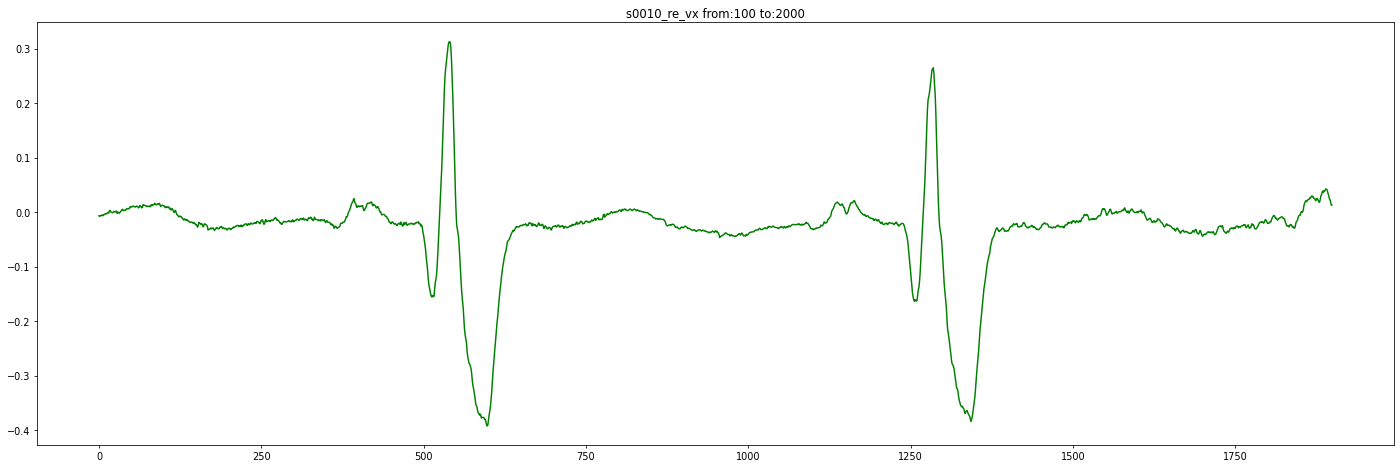

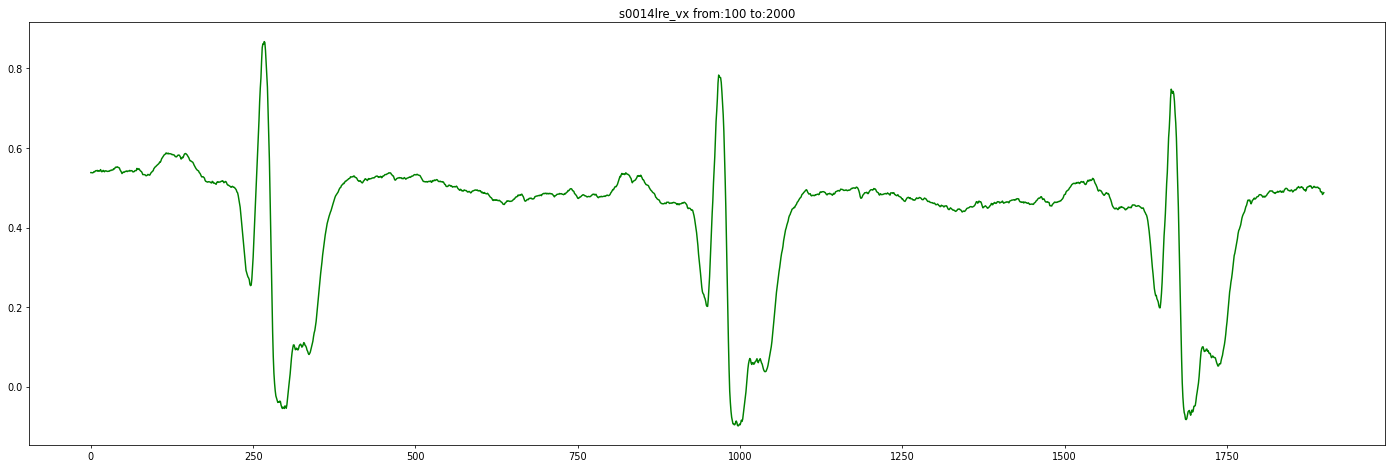

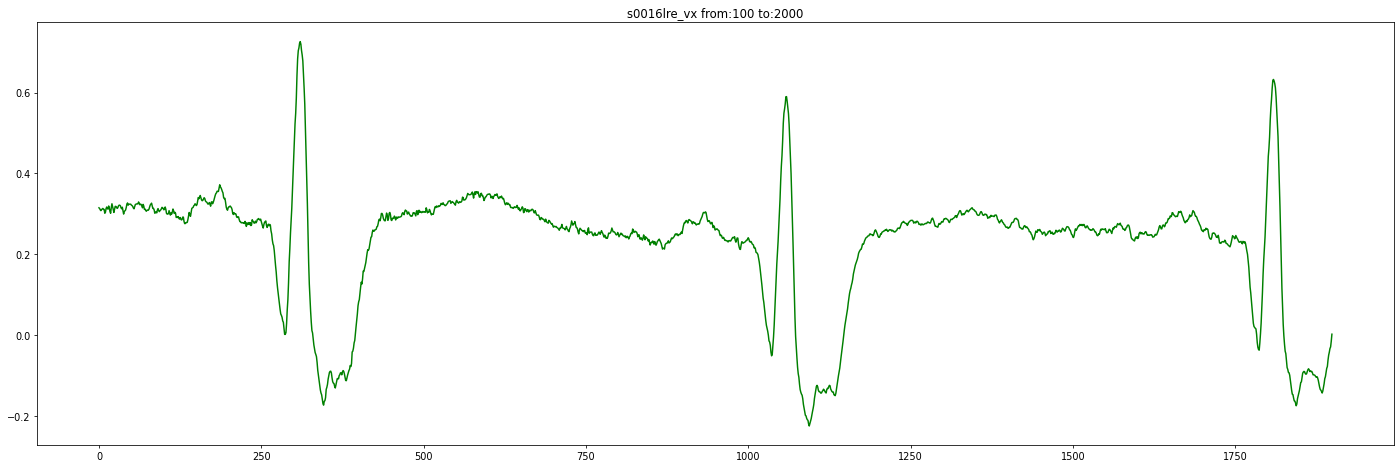

In [52]:
for i in range(3):
  plot_wave(df_group_read.vx[i],100,2000,"vx",df_group_read.record_name[i])

In [55]:
vx1=df_group_read.vx[0]

In [56]:
vx1

array([-0.0015, -0.0015, -0.0035, ...,  0.079 ,  0.081 ,  0.081 ])

In [ ]:
# vx1_str=str(vx1.tolist())
# vx1_str

In [ ]:
def array_to_str(da):
  return str(array.tolist())

In [ ]:
#array to list
df.iloc[:,4:].apply(lambda x:str(x.tolist()))

i      [array([-0.2445, -0.2425, -0.2415, ...,  0.152...
ii     [array([-0.229 , -0.2335, -0.2345, ...,  0.269...
iii    [array([0.0155, 0.009 , 0.007 , ..., 0.118 , 0...
avr    [array([ 0.237 ,  0.238 ,  0.238 , ..., -0.211...
avl    [array([-0.13  , -0.1255, -0.124 , ...,  0.017...
avf    [array([-0.107 , -0.1125, -0.114 , ...,  0.194...
v1     [array([-0.044 , -0.042 , -0.044 , ..., -0.083...
v2     [array([-0.1205, -0.1175, -0.118 , ...,  0.098...
v3     [array([-0.056 , -0.051 , -0.0535, ...,  0.073...
v4     [array([ 0.106 ,  0.1095,  0.1095, ..., -0.077...
v5     [array([ 0.1965,  0.202 ,  0.2005, ..., -0.120...
v6     [array([ 0.195 ,  0.198 ,  0.1965, ..., -0.161...
vx     [array([-0.0015, -0.0015, -0.0035, ...,  0.079...
vy     [array([0.06  , 0.061 , 0.0555, ..., 0.036 , 0...
vz     [array([-0.009 , -0.01  , -0.0085, ...,  0.031...
dtype: object

In [ ]:
df.i[0]

array([-0.2445, -0.2425, -0.2415, ...,  0.152 ,  0.136 ,  0.135 ])

In [ ]:
df.to_csv(data_path+"data_all.csv")

# noisy cancelation
#//todo

In [ ]:
import os
import datetime

import wfdb
import pywt
import seaborn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# project path
project_path = PATH+'s0173lre'
# logs path
log_dir = project_path + "logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_path = project_path + "ecg_model.h5"

# testing 
RATIO = 0.3


# denoise  function
def denoise(data):
    # wavedec
    coeffs = pywt.wavedec(data=data, wavelet='db5', level=9)
    cA9, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

    # threshold
    threshold = (np.median(np.abs(cD1)) / 0.6745) * (np.sqrt(2 * np.log(len(cD1))))
    cD1.fill(0)
    cD2.fill(0)
    for i in range(1, len(coeffs) - 2):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    rdata = pywt.waverec(coeffs=coeffs, wavelet='db5')
    return rdata



def getDataSet(number, X_data, Y_data):
    ecgClassSet = ['N', 'A', 'V', 'L', 'R']

    # Reading the ECG data
    print("Reading " + number + " ECG data...")
    record = wfdb.rdrecord(PATH +'s0173lre', channel_names=['vx'])
    data = record.p_signal.flatten()
    rdata = denoise(data=data)
    print(data)
    print(rdata)
   
    annotation = wfdb.show_ann_labels()
    Rlocation = annotation.sample
    Rclass = annotation.symbol

    
    start = 10
    end = 5
    i = start
    j = len(annotation.symbol) - end

    while i < j:
        try:
            lable = ecgClassSet.index(Rclass[i])
            x_train = rdata[Rlocation[i] - 99:Rlocation[i] + 201]
            X_data.append(x_train)
            Y_data.append(lable)
            i += 1
        except ValueError:
            i += 1
    return



def loadData():   
    numberSet = ['s0173lre']
    dataSet = []
    lableSet = []
    for n in numberSet:
        getDataSet(n, dataSet, lableSet)

    dataSet = np.array(dataSet).reshape(-1, 300)
    lableSet = np.array(lableSet).reshape(-1, 1)
    train_ds = np.hstack((dataSet, lableSet))
    np.random.shuffle(train_ds)

    X = train_ds[:, :300].reshape(-1, 300, 1)
    Y = train_ds[:, 300]

    shuffle_index = np.random.permutation(len(X))
    test_length = int(RATIO * len(shuffle_index))
    test_index = shuffle_index[:test_length]
    train_index = shuffle_index[test_length:]
    X_test, Y_test = X[test_index], Y[test_index]
    X_train, Y_train = X[train_index], Y[train_index]
    return X_train, Y_train, X_test, Y_test



def buildModel():
    newModel = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(300, 1)),
        tf.keras.layers.Conv1D(filters=4, kernel_size=21, strides=1, padding='SAME', activation='relu'),
       
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='SAME'),
        
        tf.keras.layers.Conv1D(filters=16, kernel_size=23, strides=1, padding='SAME', activation='relu'),
        
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='SAME'),
       
        tf.keras.layers.Conv1D(filters=32, kernel_size=25, strides=1, padding='SAME', activation='relu'),
       
        tf.keras.layers.AvgPool1D(pool_size=3, strides=2, padding='SAME'),
       
        tf.keras.layers.Conv1D(filters=64, kernel_size=27, strides=1, padding='SAME', activation='relu'),
       
        tf.keras.layers.Flatten(),
       
        tf.keras.layers.Dense(128, activation='relu'),
       
        tf.keras.layers.Dropout(rate=0.2),
       
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return newModel



def plotHeatMap(Y_test, Y_pred):
    con_mat = confusion_matrix(Y_test, Y_pred)
   
    # con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
    # con_mat_norm = np.around(con_mat_norm, decimals=2)

    # plot
    plt.figure(figsize=(8, 8))
    seaborn.heatmap(con_mat, annot=True, fmt='.20g', cmap='Blues')
    plt.ylim(0, 5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


def main():
    X_train, Y_train, X_test, Y_test = loadData()

    if os.path.exists(model_path):      
        model = tf.keras.models.load_model(filepath=model_path)
    else:      
        model = buildModel()
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.summary()        
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)        
        model.fit(X_train, Y_train, epochs=30,
                  batch_size=128,
                  validation_split=RATIO,
                  callbacks=[tensorboard_callback])
        model.save(filepath=model_path)

   
    Y_pred = model.predict_classes(X_test)
    
    plotHeatMap(Y_test, Y_pred)

